In [1]:
from sympy import *

> `sympy`是python下的一个符号运算库，可能效率上比不过matlab，不过日常的使用应该还是可以的，主要是比较喜欢python的风格，而且数值计算在拟合一块中遇到了正交多项式生成的问题，而`numpy`和`scipy`还不够熟悉，就稍微看了下`sympy`

> 来自[文档](http://www.asmeurer.com/sympy_doc/dev-py3k/modules/index.html)，在用到相应功能时会进行相应补充

In [14]:
# 官方的格式化打印
from sympy import init_printing
init_printing(use_unicode=True, wrap_line=False, no_global=True)

## 变量

> `pi`&`E`是模块中的符号，`oo`则是无穷

In [5]:
# 两个常量
print(pi, E)
print(pi.evalf(), E.evalf())
print('- ' * 20)
# 无穷
print(oo)
print("oo + 1: ", oo + 1)

pi E
3.14159265358979 2.71828182845905
- - - - - - - - - - - - - - - - - - - - 
oo
oo + 1:  oo


> 变量--`sympy`中需要明确地声明符号变量

In [7]:
# 自己声明
z1 = Symbol('z1')
# or 别的函数
z2, z3 = symbols('z2, z3')
var('g:3') # 范围表示的生成

(g0, g1, g2)

In [15]:
# 预定义的
from sympy.abc import x, y, z, theta

## 基本运算

### 多项式

In [12]:
y = Symbol('y')
print(x + x - y) # 基本的简化

2*x - y


In [13]:
((x + y)**2).expand() # 多项式展开

x**2 + 2*x*y + y**2

In [16]:
from sympy import apart
a = 1/( (x + 2)*(x + 1) )
print(a)
print(apart(a)) # 分数分解

1/((x + 1)*(x + 2))
-1/(x + 2) + 1/(x + 1)


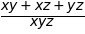

In [17]:
from sympy import together
together(1/x + 1/y + 1/z) # 分数组合

### 矩阵

In [30]:
from sympy import Matrix, Symbol
Matrix([[1, 0], [0, 1]])

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [37]:
A = Matrix([[1, x], [y, 1]])
print(A**2)
print(A**(-1))

Matrix([[x*y + 1, 2*x], [2*y, x*y + 1]])
Matrix([[1/(-x*y + 1), -x/(-x*y + 1)], [-y/(-x*y + 1), 1/(-x*y + 1)]])


In [39]:
# pprint并不会变好看，但是如下的输出会
A**(-1)

⎡   1        -x    ⎤
⎢────────  ────────⎥
⎢-x⋅y + 1  -x⋅y + 1⎥
⎢                  ⎥
⎢  -y         1    ⎥
⎢────────  ────────⎥
⎣-x⋅y + 1  -x⋅y + 1⎦

In [40]:
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt

In [45]:
a = Matrix([ # 行矩阵
    [1, 2, 3]
])
b = Matrix([1, 2, 3]) # 列矩阵
a, b

⎛           ⎡1⎤⎞
⎜           ⎢ ⎥⎟
⎜[1  2  3], ⎢2⎥⎟
⎜           ⎢ ⎥⎟
⎝           ⎣3⎦⎠

In [46]:
# 从列表创建
Matrix(2, 3, [1, 2, 3, 4, 5, 6])

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [47]:
# 从函数创建
def f(i, j):
    return i ** j
Matrix(3, 3, f) # or lambda

⎡1  0  0⎤
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  2  4⎦

In [48]:
# eye, zeros, ones, diag 和它们该有的功能一样
eye(4)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [49]:
# 可以组合分块矩阵
diag(1, Matrix([[1, 2], [3, 4]]))

⎡1  0  0⎤
⎢       ⎥
⎢0  1  2⎥
⎢       ⎥
⎣0  3  4⎦

In [51]:
M = Matrix(2, 3, [2, 3, 4, 5, 6, 7])
print("M[4]: ", M[4]) # 注意和之前习惯的索引不一样
print("M[1, 1]: ", M[1, 1])
print("M[:, 2]", M[:, 2]) # 片选

M[4]:  6
M[1, 1]:  6
M[:, 2] Matrix([[4], [7]])


In [53]:
M = Matrix(2, 2, [1, 1, 1, 1])
M1 = M[:, :] # deep copy
M2 = M       # 引用
M1[1, 1] = 100
print(M, M1, M2)
M2[1, 1] = 200
print(M, M1, M2)

Matrix([[1, 1], [1, 1]]) Matrix([[1, 1], [1, 100]]) Matrix([[1, 1], [1, 1]])
Matrix([[1, 1], [1, 200]]) Matrix([[1, 1], [1, 100]]) Matrix([[1, 1], [1, 200]])


In [55]:
# 删除 行，列
M = Matrix(([1,2,3],[4,5,6],[7,8,9]))
M.row_del(0)
M.col_del(1)
M

⎡4  6⎤
⎢    ⎥
⎣7  9⎦

In [56]:
M1 = eye(3)
M2 = zeros(3, 3)
M1.row_join(M2) # 注意不会修改原来矩阵 还有一个 col_join

⎡1  0  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎣0  0  1  0  0  0⎦

## 实用工具

### 化简

In [26]:
simplify((x + y)**2 + (x + 2*y)**2 + x**3 + x**2 + 2*x*y + y**2)

### 格式化

#### letex

In [18]:
from sympy import Integral, latex

In [28]:
a = (x + y)**2 + (x + 2*y)**2 + x**3 + x**2 + 2*x*y + y**2
print(latex(a, mode='inline'))
print(latex(a, mode='equation'))
print(latex(a, mode='equation*'))

$x^{3} + x^{2} + 2 x y + y^{2} + \left(x + y\right)^{2} + \left(x + 2 y\right)^{2}$
\begin{equation}x^{3} + x^{2} + 2 x y + y^{2} + \left(x + y\right)^{2} + \left(x + 2 y\right)^{2}\end{equation}
\begin{equation*}x^{3} + x^{2} + 2 x y + y^{2} + \left(x + y\right)^{2} + \left(x + 2 y\right)^{2}\end{equation*}


> 上面这些打印  
$x^{3} + x^{2} + 2 x y + y^{2} + \left(x + y\right)^{2} + \left(x + 2 y\right)^{2}$
\begin{equation}x^{3} + x^{2} + 2 x y + y^{2} + \left(x + y\right)^{2} + \left(x + 2 y\right)^{2}\end{equation}
\begin{equation*}x^{3} + x^{2} + 2 x y + y^{2} + \left(x + y\right)^{2} + \left(x + 2 y\right)^{2}\end{equation*}

#### MathML

In [29]:
from sympy.printing.mathml import mathml
from sympy import Integral, latex
from sympy.abc import x
print(mathml(x**2))

<apply><power/><ci>x</ci><cn>2</cn></apply>


> 上面的公式--jupyter 可能不支持  
<apply><power/><ci>x</ci><cn>2</cn></apply>

### 和numpy的交互

In [58]:
import numpy as np
x = Symbol("x")
a = x**3
t = np.array([1, 2])
a.evalf(subs = {'x': t})
f = lambdify("x", a, "numpy") # 为simpy下的函数，最好加上命名空间
f(t)

array([1, 8], dtype=int32)